In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/processed/bookings_Binnings_Handled.csv')
df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,1,37,3.637586
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,1,60,4.110874
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,1,57,4.060443
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,1,53,3.988984
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,1,88,4.488636


In [3]:
# Combine imputation and scaling in one step
imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

# Impute and scale in sequence
df['employees_on_duty'] = scaler.fit_transform(
    imputer.fit_transform(df[['employees_on_duty']])
)

print(f"\nMissing values: {df['employees_on_duty'].isnull().sum()}")

df.head()


Missing values: 0


,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-1.391228,37,3.637586
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-1.391228,60,4.110874
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-1.391228,57,4.060443
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-1.391228,53,3.988984
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-1.391228,88,4.488636


In [4]:
# Count values greater than 0
count_greater_than_0 = (df['employees_on_duty'] > 0).sum()
print(f"Values greater than 0: {count_greater_than_0}")

Values greater than 0: 85689


In [5]:
# Parse date and time
df['appointment_date_parsed'] = pd.to_datetime(df['appointment_date'], errors='coerce')

# Extract hour_of_day from time; robust to formats like HH:MM or HH:MM:SS
appt_time_parsed = pd.to_datetime(df['appointment_time'].astype(str), errors='coerce')
df['hour_of_day'] = appt_time_parsed.dt.hour

# Cyclical encoding for hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)

df.head()

/var/folders/lx/fj0jgh0s0rg95r58q33kw2b40000gn/T/ipykernel_3174/3652946082.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appt_time_parsed = pd.to_datetime(df['appointment_time'].astype(str), errors='coerce')


,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log,appointment_date_parsed,hour_of_day,hour_sin,hour_cos
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-1.391228,37,3.637586,2021-01-01,9,0.707107,-0.707107
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-1.391228,60,4.110874,2021-01-01,9,0.707107,-0.707107
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-1.391228,57,4.060443,2021-01-01,9,0.707107,-0.707107
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-1.391228,53,3.988984,2021-01-01,9,0.707107,-0.707107
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-1.391228,88,4.488636,2021-01-01,10,0.500000,-0.866025


In [6]:
# 0=Monday ... 6=Sunday
df['day_of_week'] = df['appointment_date_parsed'].dt.dayofweek

# Ensure all 5 categories appear as columns even if absent in data
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=list(range(5)))
dow_dummies = pd.get_dummies(df['day_of_week'], prefix='dow', dtype=int)

# Attach to df
df = pd.concat([df, dow_dummies], axis=1)

df.drop(columns=["day_of_week", "hour_of_day"], inplace=True)

df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log,appointment_date_parsed,hour_sin,hour_cos,dow_0,dow_1,dow_2,dow_3,dow_4
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-1.391228,37,3.637586,2021-01-01,0.707107,-0.707107,0,0,0,0,1
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-1.391228,60,4.110874,2021-01-01,0.707107,-0.707107,0,0,0,0,1
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-1.391228,57,4.060443,2021-01-01,0.707107,-0.707107,0,0,0,0,1
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-1.391228,53,3.988984,2021-01-01,0.707107,-0.707107,0,0,0,0,1
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-1.391228,88,4.488636,2021-01-01,0.500000,-0.866025,0,0,0,0,1


In [7]:
df['month'] = df['appointment_date_parsed'].dt.month

# Ensure all 12 months appear
df['month'] = pd.Categorical(df['month'], categories=list(range(1, 13)))
month_dummies = pd.get_dummies(df['month'], prefix='month', dtype=int)

# Attach to df
df = pd.concat([df, month_dummies], axis=1)

df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-1.391228,37,3.637586,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-1.391228,60,4.110874,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-1.391228,57,4.060443,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-1.391228,53,3.988984,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-1.391228,88,4.488636,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Extract day of month from appointment_date
df['day_of_month'] = df['appointment_date_parsed'].dt.day

# Cyclical encoding for day of month (1-31)
df['day_of_month_sin'] = np.sin(2 * np.pi * df['day_of_month'] / 31)
df['day_of_month_cos'] = np.cos(2 * np.pi * df['day_of_month'] / 31)

# Binning approach for business logic
# Group days into meaningful categories
# df['day_category'] = pd.cut(df['day_of_month'], 
#                            bins=[0, 10, 20, 31], 
#                            labels=['early_month', 'mid_month', 'late_month'],
#                            include_lowest=True)

# One-hot encode the day category
# day_category_dummies = pd.get_dummies(df['day_category'], prefix='day_cat', dtype=int)
# df = pd.concat([df, day_category_dummies], axis=1)

# Show the new columns
print("New day-related columns:")
print(df[['day_of_month', 'day_of_month_sin', 'day_of_month_cos']])

df.drop(columns=['day_of_month'], inplace=True)

New day-related columns:
        day_of_month  day_of_month_sin  day_of_month_cos
0                  1      2.012985e-01           0.97953
1                  1      2.012985e-01           0.97953
2                  1      2.012985e-01           0.97953
3                  1      2.012985e-01           0.97953
4                  1      2.012985e-01           0.97953
...              ...               ...               ...
203688            31     -2.449294e-16           1.00000
203689            31     -2.449294e-16           1.00000
203690            31     -2.449294e-16           1.00000
203691            31     -2.449294e-16           1.00000
203692            31     -2.449294e-16           1.00000

[203693 rows x 3 columns]


In [9]:
df.drop(columns=['appointment_date_parsed'], inplace=True)

# Show final result
df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_month_sin,day_of_month_cos
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-1.391228,37,3.637586,...,0,0,0,0,0,0,0,0,0.201299,0.97953
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-1.391228,60,4.110874,...,0,0,0,0,0,0,0,0,0.201299,0.97953
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-1.391228,57,4.060443,...,0,0,0,0,0,0,0,0,0.201299,0.97953
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-1.391228,53,3.988984,...,0,0,0,0,0,0,0,0,0.201299,0.97953
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-1.391228,88,4.488636,...,0,0,0,0,0,0,0,0,0.201299,0.97953


In [10]:
# Ensure appointment_date is datetime
df['appointment_date_parsed'] = pd.to_datetime(df['appointment_date'], errors='coerce')

# Filter to the requested years
df_ym = df[df['appointment_date_parsed'].dt.year.between(2021, 2024)].copy()

# Derive year, month number, and month name
df_ym['year'] = df_ym['appointment_date_parsed'].dt.year
df_ym['month_num'] = df_ym['appointment_date_parsed'].dt.month
df_ym['month'] = df_ym['appointment_date_parsed'].dt.month_name()

In [11]:
monthly_counts = (
	df_ym.groupby(['year', 'month_num', 'month'])
	.size()
	.reset_index(name='appointments')
)

# Order months Jan..Dec
month_order = list(range(1, 13))
monthly_counts = monthly_counts.sort_values(['year', 'month_num'])
monthly_counts.head()

,year,month_num,month,appointments
0,2021,1,January,4180
1,2021,2,February,3450
2,2021,3,March,4475
3,2021,4,April,3460
4,2021,5,May,3625


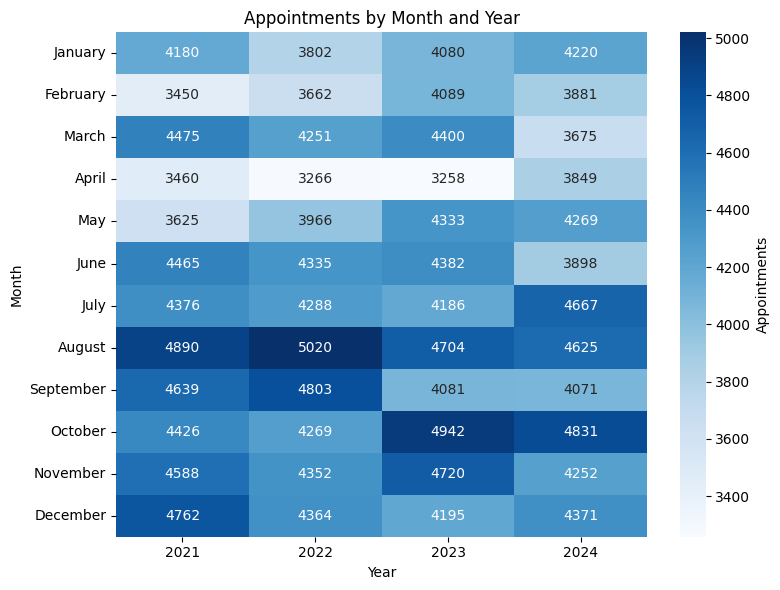

In [12]:
# Pivot to month x year
heatmap_df = monthly_counts.pivot(index='month', columns='year', values='appointments')

# Reindex rows to calendar order Jan..Dec
month_names_ordered = pd.date_range('2021-01-01', periods=12, freq='MS').month_name().tolist()
heatmap_df = heatmap_df.reindex(month_names_ordered)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Appointments'})
plt.title('Appointments by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

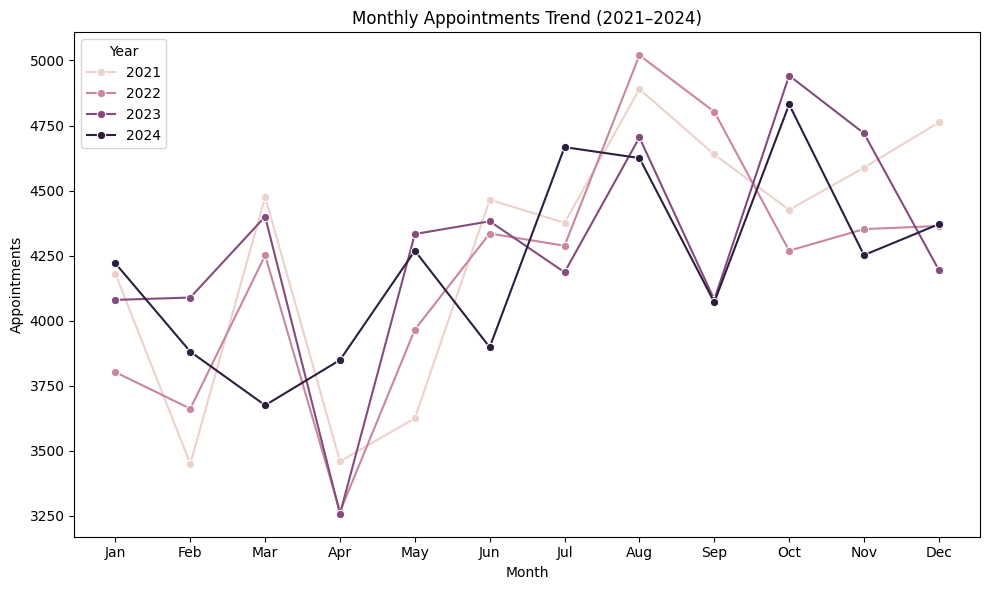

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(
	data=monthly_counts,
	x='month_num', y='appointments',
	hue='year', marker='o'
)
plt.xticks(ticks=range(1, 13), labels=pd.date_range('2021-01-01', periods=12, freq='MS').strftime('%b'))
plt.title('Monthly Appointments Trend (2021–2024)')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

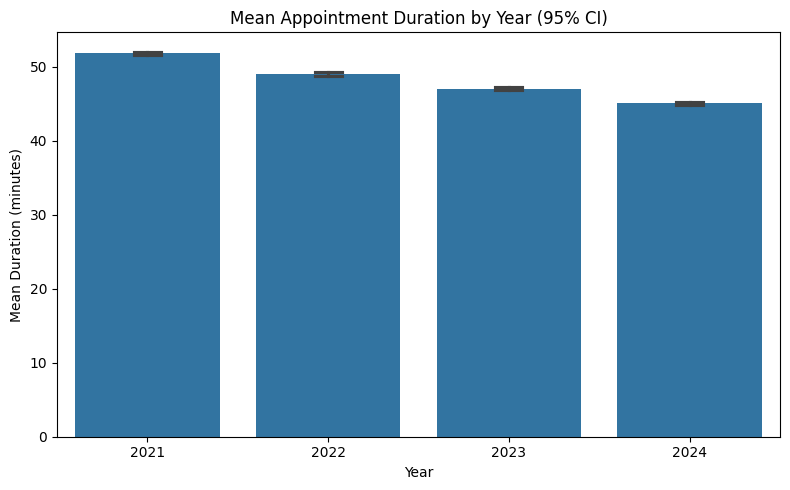

In [14]:
df['year'] = df['appointment_date_parsed'].dt.year

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='year', y='duration_minutes', estimator='mean', errorbar='ci', capsize=.15)
plt.title('Mean Appointment Duration by Year (95% CI)')
plt.xlabel('Year')
plt.ylabel('Mean Duration (minutes)')
plt.tight_layout()
plt.show()

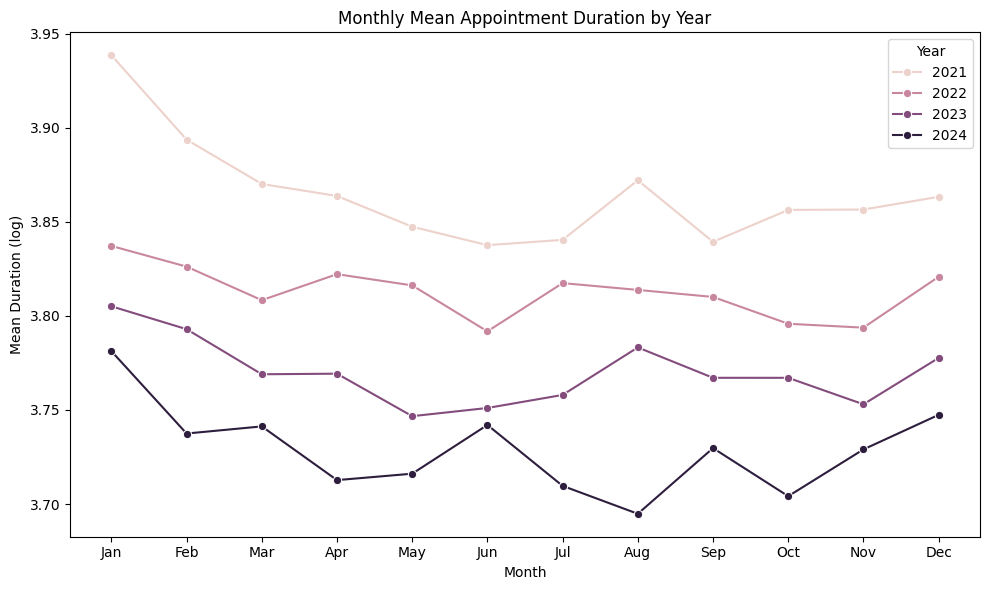

In [15]:
tmp = df.copy()
tmp['month_num'] = tmp['appointment_date_parsed'].dt.month
monthly_means = (tmp.groupby(['year','month_num'])['duration_log']
                   .mean()
                   .reset_index())

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_means, x='month_num', y='duration_log', hue='year', marker='o')
plt.xticks(ticks=range(1,13), labels=pd.date_range('2000-01-01', periods=12, freq='MS').strftime('%b'))
plt.title('Monthly Mean Appointment Duration by Year')
plt.xlabel('Month')
plt.ylabel('Mean Duration (log)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [16]:
# One-hot encode year with fixed categories
df['year'] = pd.Categorical(df['year'], categories=[2021, 2022, 2023, 2024])
year_dummies = pd.get_dummies(df['year'], prefix='year', dtype=int)

# Attach and (optionally) drop the original year column
df = pd.concat([df, year_dummies], axis=1)
df.drop(columns=['year'], inplace=True)  # uncomment if you don’t want the numeric year

# Quick check of new columns
df.filter(regex=r'^year_').head()

,year_2021,year_2022,year_2023,year_2024
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [17]:
# Ensure task_id is string and handle missing values
df['task_id'] = df['task_id'].astype('string')

# Fix categories for stable columns
task_categories = sorted(df['task_id'].unique())
df['task_id'] = pd.Categorical(df['task_id'], categories=task_categories)

# One-hot encode
task_dummies = pd.get_dummies(df['task_id'], prefix='task', dtype=int)
df = pd.concat([df, task_dummies], axis=1)

# Quick check
df.filter(regex=r'^task_').head()

,task_id,task_TASK-001,task_TASK-002,task_TASK-003,task_TASK-004,task_TASK-005,task_TASK-006,task_TASK-007,task_TASK-008,task_TASK-009,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,TASK-002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TASK-001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TASK-002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TASK-001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TASK-002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_encoded= df.drop(columns=["task_id", "booking_date", "appointment_date", "appointment_time", "appointment_date_parsed"])
df_encoded.head()

,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log,hour_sin,hour_cos,dow_0,dow_1,...,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,0,2,4,-1.391228,37,3.637586,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,-1.391228,60,4.110874,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,5,-1.391228,57,4.060443,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,4,-1.391228,53,3.988984,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8,3,-1.391228,88,4.488636,0.500000,-0.866025,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_encoded.to_csv('data/processed/bookings_Encoded.csv', index=False)
df_encoded.head()

,num_documents,queue_number,satisfaction_rating,employees_on_duty,duration_minutes,duration_log,hour_sin,hour_cos,dow_0,dow_1,...,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,0,2,4,-1.391228,37,3.637586,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,-1.391228,60,4.110874,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,5,-1.391228,57,4.060443,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,4,-1.391228,53,3.988984,0.707107,-0.707107,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8,3,-1.391228,88,4.488636,0.500000,-0.866025,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_preprocessed= df_encoded.drop(columns=["num_documents", "queue_number", "satisfaction_rating", "duration_minutes", "month"])

df_preprocessed.to_csv('data/processed/bookings_PreProcessed.csv', index=False)
df_preprocessed.head()

,employees_on_duty,duration_log,hour_sin,hour_cos,dow_0,dow_1,dow_2,dow_3,dow_4,month_1,...,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,-1.391228,3.637586,0.707107,-0.707107,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.391228,4.110874,0.707107,-0.707107,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.391228,4.060443,0.707107,-0.707107,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.391228,3.988984,0.707107,-0.707107,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,-1.391228,4.488636,0.500000,-0.866025,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
